In [ ]:
import pandas as pd
import sqlite3

In [ ]:
conn = sqlite3.connect("/content/drive/MyDrive/data realted/spotify.sqlite" )

In [ ]:
cur= conn.cursor()

In [ ]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
cur.execute(query)
cur.fetchall()

[('albums',),
 ('artists',),
 ('audio_features',),
 ('genres',),
 ('r_albums_artists',),
 ('r_albums_tracks',),
 ('r_artist_genre',),
 ('r_track_artist',),
 ('tracks',)]

In [ ]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
pd.read_sql(query, conn)

,name
0,albums
1,artists
2,audio_features
3,genres
4,r_albums_artists
5,r_albums_tracks
6,r_artist_genre
7,r_track_artist
8,tracks


In [ ]:
query = "SELECT * FROM albums LIMIT 5;"
pd.read_sql(query, conn)

,id,name,album_group,album_type,release_date,popularity
0,2jKoVlU7VAmExKJ1Jh3w9P,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",,album,954633600000,0
1,4JYUDRtPZuVNi7FAnbHyux,"Flava in Ya Ear Remix (feat. Notorious B.I.G.,...",,single,757382400000,0
2,6YjKAkDYmlasMqYw73iB0w,Bitch Please II,,album,959040000000,0
3,2YlvHjDb4Tyxl4A1IcDhAe,Just Dippin',,compilation,1104537600000,0
4,3UOuBNEin5peSRqdzvlnWM,Still D.R.E.,,album,942710400000,0


In [ ]:
query = "SELECT * FROM artists LIMIT 5;"
pd.read_sql(query, conn)

,name,id,popularity,followers
0,Xzibit,4tujQJicOnuZRLiBFdp3Ou,69,1193665
1,Erick Sermon,2VX0o9LDIVmKIgpnwdJpOJ,54,142007
2,J. Ro,3iBOsmwGzRKyR0vs2I61xP,45,158
3,Tash,22qf8cJRzBjIWb2Jc4JeOr,48,3421
4,Craig Mack,4akj4uteQQrrGxhX9Rjuyf,55,161966


In [ ]:
query = "SELECT * FROM audio_features LIMIT 5;"
pd.read_sql(query, conn)

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2jKoVlU7VAmExKJ1Jh3w9P,0.1800,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
1,4JYUDRtPZuVNi7FAnbHyux,0.2720,https://api.spotify.com/v1/audio-analysis/4JYU...,0.520,302013,0.847,0.000000,9,0.3250,-5.300,1,0.427,177.371002,4,0.799
2,6YjKAkDYmlasMqYw73iB0w,0.0783,https://api.spotify.com/v1/audio-analysis/6YjK...,0.918,288200,0.586,0.000000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
3,2YlvHjDb4Tyxl4A1IcDhAe,0.5840,https://api.spotify.com/v1/audio-analysis/2Ylv...,0.877,243013,0.681,0.000000,1,0.1190,-6.277,0,0.259,94.834999,4,0.839
4,3UOuBNEin5peSRqdzvlnWM,0.1700,https://api.spotify.com/v1/audio-analysis/3UOu...,0.814,270667,0.781,0.000518,11,0.0520,-3.330,1,0.233,93.445000,4,0.536


In [ ]:
query = "SELECT name, album_type, popularity FROM albums GROUP BY id LIMIT 5;"
pd.read_sql(query, conn)

,name,album_type,popularity
0,Guajira Cubana - Original Mix,single,0
1,Cherryholmes,album,7
2,Eye Of The Hurricane,album,0
3,Vee Vee (Remastered),album,13
4,Human Experiments,compilation,0


In [ ]:
print(pd.read_sql("PRAGMA table_info(albums);", conn))


   cid          name type  notnull dflt_value  pk
0    0            id             0       None   0
1    1          name             0       None   0
2    2   album_group             0       None   0
3    3    album_type             0       None   0
4    4  release_date             0       None   0
5    5    popularity             0       None   0


In [ ]:
print(pd.read_sql("PRAGMA table_info(artists);", conn))



   cid        name type  notnull dflt_value  pk
0    0        name             0       None   0
1    1          id             0       None   0
2    2  popularity             0       None   0
3    3   followers             0       None   0


In [ ]:
print(pd.read_sql("PRAGMA table_info(audio_features);", conn))



    cid              name type  notnull dflt_value  pk
0     0                id             0       None   0
1     1      acousticness             0       None   0
2     2      analysis_url             0       None   0
3     3      danceability             0       None   0
4     4          duration             0       None   0
5     5            energy             0       None   0
6     6  instrumentalness             0       None   0
7     7               key             0       None   0
8     8          liveness             0       None   0
9     9          loudness             0       None   0
10   10              mode             0       None   0
11   11       speechiness             0       None   0
12   12             tempo             0       None   0
13   13    time_signature             0       None   0
14   14           valence             0       None   0


In [ ]:
print(pd.read_sql("PRAGMA table_info(genres);", conn))


   cid name type  notnull dflt_value  pk
0    0   id             0       None   0


In [ ]:
query = "SELECT name AS artist_name, popularity, MAX(followers) AS followers FROM artists GROUP BY popularity LIMIT 10;"
pd.read_sql(query, conn)


,artist_name,popularity,followers
0,Various Artists,0,1133954
1,Connor Franta,1,226747
2,Anjali,2,59188
3,Jack,3,74447
4,The Green Raver,4,34972
5,RENT Soundtrack,5,91098
6,Homer the Vet,6,37145
7,Billy Redfield,7,136043
8,S.O.D.,8,96866
9,La Differenza,9,90690


## **The top 3 artists with the most followers are Connor Franta , then Anjali, Jack**

In [ ]:
query = """ SELECT album_type, AVG(popularity) AS avg_popularity
FROM albums GROUP BY album_type ORDER BY avg_popularity; """
pd.read_sql(query, conn)


,album_type,avg_popularity
0,compilation,0.954435
1,album,1.963755
2,single,5.779671


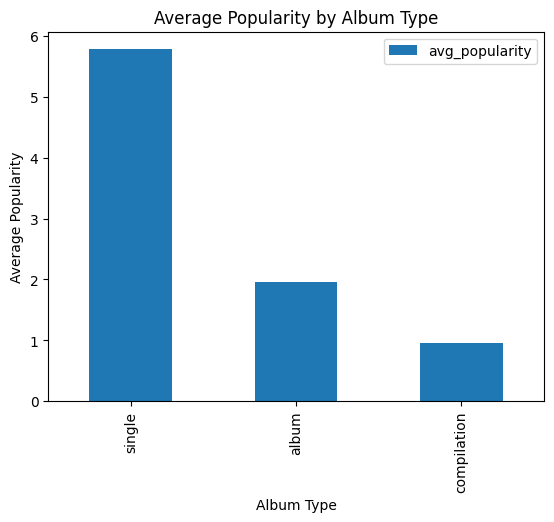

In [ ]:
query = """
SELECT
    album_type,
    AVG(popularity) AS avg_popularity
FROM albums
GROUP BY album_type
ORDER BY avg_popularity DESC;
"""
df = pd.read_sql(query, conn)

df.plot(kind='bar', x='album_type', y='avg_popularity', title="Average Popularity by Album Type")

import matplotlib.pyplot as plt
plt.xlabel("Album Type")
plt.ylabel("Average Popularity")
plt.show()

## **Singles are more popular.**

<Axes: title={'center': 'Followers vs Popularity'}, xlabel='followers', ylabel='popularity'>

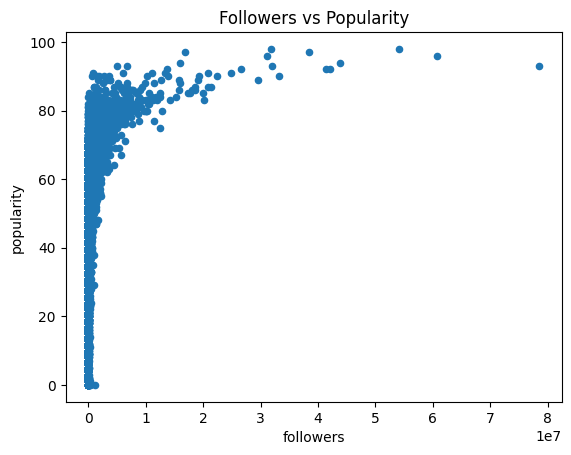

In [ ]:
query = """ SELECT followers, popularity FROM artists WHERE followers IS NOT NULL AND popularity IS NOT NULL;"""
df = pd.read_sql(query, conn)
df.plot(kind='scatter', x='followers', y='popularity', title="Followers vs Popularity")

## **There are some popular artists that do not have many followers**




<Axes: title={'center': 'Energy vs Duration for Popular Tracks'}, xlabel='energy', ylabel='duration'>

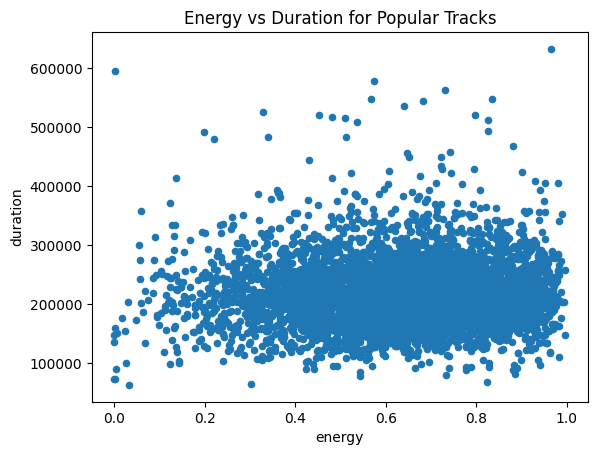

In [ ]:
query = """
SELECT audio_features.energy, audio_features.duration FROM audio_features JOIN tracks ON audio_features.id = tracks.id WHERE tracks.popularity > 70;"""
df = pd.read_sql(query, conn)
df.plot(kind='scatter', x='energy', y='duration', title="Energy vs Duration for Popular Tracks")


The chart shows that popular tracks are typically 3–5 minutes long and have moderate-to-high energy, with no clear correlation between energy and duration.

In [ ]:
+query = "SELECT * FROM r_albums_artists LIMIT 5;"
pd.read_sql(query, conn)

,album_id,artist_id
0,6os2Mv58OYnQClPf7B9E1s,2HS2wQTJXpA65XWOKlAVxk
1,5XXN1tFQg7D7U1NSVh5fjf,3VBpsrUi2vV7Uj87ONHu7Z
2,63wFVCPZxdaFL9WKXbIQ5m,1kC8lmaSblf7GyK915496r
3,0z7p1tHVJ6s5wxAdj9iJ6e,2bTFaANevDESpT5eGWsZ7a
4,4afYJvrsp90d3V2COlLHVE,2maQMqxNnlRrBrS1oAsrX9


In [ ]:
query = "SELECT * FROM r_albums_tracks LIMIT 5;"
pd.read_sql(query, conn)

,album_id,track_id
0,6os2Mv58OYnQClPf7B9E1s,3HnrHGLE9u2MjHtdobfWl9
1,6os2Mv58OYnQClPf7B9E1s,4lDjkpUrpWlMFofIpzuExK
2,6os2Mv58OYnQClPf7B9E1s,4RDT3ftT3V0IJVmW0TNgof
3,6os2Mv58OYnQClPf7B9E1s,1DfwOz5apF0w2d8hccSkhH
4,6os2Mv58OYnQClPf7B9E1s,46JY9OYPi4hJ7oLIS0FZt0


In [ ]:
pd.read_sql_query('''SELECT track_id
                     FROM r_albums_tracks
                     WHERE album_id = '0z7p1tHVJ6s5wxAdj9iJ6e' ''', conn)


,track_id
0,2hJjbsLCytGsnAHfdsLejp


**So album_id in r_albums_tracks and in r_albums_artists are the same.**

In [ ]:
pd.read_sql_query('''SELECT id
                     FROM artists
                     WHERE id = '3VBpsrUi2vV7Uj87ONHu7Z' ''', conn)


,id
0,3VBpsrUi2vV7Uj87ONHu7Z


In [ ]:
query = "SELECT * FROM r_artist_genre LIMIT 5;"
pd.read_sql(query, conn)

,genre_id,artist_id
0,detroit hip hop,4tujQJicOnuZRLiBFdp3Ou
1,g funk,4tujQJicOnuZRLiBFdp3Ou
2,gangster rap,4tujQJicOnuZRLiBFdp3Ou
3,hardcore hip hop,4tujQJicOnuZRLiBFdp3Ou
4,hip hop,4tujQJicOnuZRLiBFdp3Ou


In [ ]:
query = "SELECT * FROM genres LIMIT 5;"
pd.read_sql(query, conn)

,id
0,detroit hip hop
1,g funk
2,gangster rap
3,hardcore hip hop
4,hip hop


In [ ]:
query = '''SELECT
    genres.id AS genre,
    AVG(tracks.popularity) AS avg_popularity
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY genres.id
ORDER BY avg_popularity;'''
pd.read_sql(query, conn)

,genre,avg_popularity
0,alandsk musik,0.000000
1,turkce kadin rap,0.000000
2,handbells,0.027211
3,trallalero,0.093023
4,chinese opera,0.112245
...,...,...
5484,melodic rap,37.983932
5485,himachali pop,39.500000
5486,hypnosis mic,44.680000
5487,dream smp,46.300000


## genres like "melodic rap" and "instrumental lullaby" stand out as significantly more popular

In [ ]:
query = '''SELECT
    artists.name AS artist_name,
    AVG(albums.popularity) AS avg_album_popularity
FROM artists
JOIN r_albums_artists ON artists.id = r_albums_artists.artist_id
JOIN albums ON r_albums_artists.album_id = albums.id
GROUP BY artists.name
ORDER BY avg_album_popularity DESC
LIMIT 10;'''
pd.read_sql(query, conn)


,artist_name,avg_album_popularity
0,Silk Sonic,89.00
1,Mufasa & Hypeman,87.00
2,JACKBOYS,84.00
3,HVME,83.50
4,A7S,83.50
5,Lil Nas X,83.25
6,Ricky Montgomery,83.00
7,Paulo Londra,82.00
8,Calum Scott,82.00
9,Bradley Cooper,82.00


## Silk Sonic, Mufasa & Hypeman	and JACKBOYS have the most popular albums

In [ ]:
query = '''SELECT
    genres.id AS genre_name,
    COUNT(tracks.id) AS track_count
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
WHERE tracks.popularity > 80
GROUP BY genres.id
ORDER BY track_count DESC
LIMIT 10;'''
pd.read_sql(query, conn)

,genre_name,track_count
0,pop,465
1,dance pop,244
2,rap,223
3,post-teen pop,205
4,pop rap,205
5,trap latino,169
6,reggaeton,144
7,latin,144
8,trap,128
9,hip hop,126


## Most common genres in Top tracks are pop, dance pop and rap

In [ ]:
query = '''
SELECT
    artists.name AS artist_name,
    AVG(audio_features.energy) AS avg_energy,
    AVG(tracks.popularity) AS avg_popularity
FROM artists
JOIN r_track_artist ON artists.id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
JOIN audio_features ON tracks.id = audio_features.id
GROUP BY artists.name
Having avg_popularity > 70
ORDER BY avg_energy
LIMIT 10;'''
pd.read_sql(query, conn)



,artist_name,avg_energy,avg_popularity
0,Clyde Boudreaux,0.00512,71.0
1,Auley Gere,0.02330,71.0
2,sagun,0.06250,76.0
3,L.Dre,0.06740,71.0
4,Mikayla Sippel,0.09420,71.0
5,The Macarons Project,0.11300,73.0
6,Edith Whiskers,0.19800,73.5
7,Sofia Mills,0.21100,73.0
8,Babblarna,0.23400,72.0
9,Sarah Cothran,0.25500,80.0


## **Artists who consistently produce high-energy tracks that are also popular.**

In [ ]:
query = """
SELECT AVG(popularity) AS avg_album_popularity
FROM albums;
"""
pd.read_sql(query, conn)

,avg_album_popularity
0,2.152412


In [ ]:
query = """
SELECT
    artists.name AS artist_name,
    AVG(tracks.popularity) AS avg_track_popularity
FROM artists
JOIN r_track_artist ON artists.id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY artists.id
ORDER BY avg_track_popularity DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,artist_name,avg_track_popularity
0,Silk Sonic,96.0
1,Mufasa & Hypeman,94.0
2,Dopamine,94.0
3,Bella Poarch,92.0
4,HVME,90.5


In [ ]:
###In this query we see top 5 artists with the highest average track popularity, showing that Silk Sonic leads with an average popularity of 96, followed by Mufasa & Hypeman and Dopamine with 94 each.

 when looking at the last table and at the table of *artist_name	avg_album_popularity * it show that Silk Sonic is at the top, with the highest average track popularity (96.0) and the highest average album popularity (89.0). Mufasa & Hypeman is second on both lists, with 94.0 for tracks and 87.0 for albums, showing they’re also very popular. HVME appears in both too, with good scores for tracks (90.5) and albums (83.5), meaning they’re doing well in both areas. These artists are the most popular in both songs and albums.








In [ ]:
query = '''SELECT
    albums.name AS album_name,
    GROUP_CONCAT(artists.name, ', ') AS featured_artists,
    albums.popularity AS album_popularity
FROM albums
JOIN r_albums_artists ON albums.id = r_albums_artists.album_id
JOIN artists ON r_albums_artists.artist_id = artists.id
GROUP BY albums.id
HAVING COUNT(artists.id) > 1
ORDER BY album_popularity DESC
LIMIT 5;'''
pd.read_sql(query, conn)

,album_name,featured_artists,album_popularity
0,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic",89
1,Bandido,"Juhn, Myke Towers",88
2,Mood (feat. iann dior),"iann dior, 24kGoldn",88
3,Calling My Phone,"6LACK, Lil Tjay",88
4,Friday (feat. Mufasa & Hypeman) [Dopamine Re-E...,"Nightcrawlers, Mufasa & Hypeman, Riton",87


This list highlights the most popular albums featuring multiple artists, with "Leave The Door Open" by Bruno Mars, Anderson .Paak, and Silk Sonic leading at a popularity score of 89. Collaborations like these, including "Bandido" and "Mood," show that teamwork between artists often results in highly successful and well-loved albums.

The analysis shows that singles are the most popular album type, with an average popularity score of 5.78, far surpassing albums (1.96) and compilations (0.95). This indicates that listeners prefer standalone tracks over larger collections.

In genres, "melodic rap" (37.98) and "instrumental lullaby" (47.35) stand out as highly popular, while niche genres like "alandsk musik" and "handbells" have little appeal. This reveals clear trends in listener preferences, with certain genres dominating the charts.

Silk Sonic emerges as the top artist with an average album popularity of 89.00, followed by Mufasa & Hypeman at 87.00, showcasing their consistent appeal. Additionally, artists like Sarah Cothran (80.0 popularity, 0.255 energy) highlight that even  tracks with not very much energy can achieve significant success.
